In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


In [24]:
athlete=pd.read_csv('athlete_events.csv')
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [25]:
region=pd.read_csv('noc_regions.csv')
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [26]:
df = pd.merge(athlete,region, how='outer', sort=True, on=['NOC'])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN


In [27]:
df_swim=df[['Sex','Age','Height','Team','Year','Season','City','Medal']]

In [28]:
age_array = df_swim[df["Age"]!=np.nan]["Age"]

df_swim["Age"].replace(np.nan,age_array.mean()).astype(int)

0         25
1         28
2         25
3         17
4         22
5         25
6         17
7         25
8         25
9         22
10        25
11        25
12        21
13        27
14        25
15        19
16        23
17        27
18        21
19        24
20        28
21        30
22        25
23        25
24        22
25        23
26        27
27        20
28        24
29        25
          ..
271087    25
271088    35
271089    23
271090    24
271091    26
271092    41
271093    32
271094    28
271095    28
271096    32
271097    28
271098    26
271099    29
271100    31
271101    26
271102    24
271103    24
271104    34
271105    28
271106    24
271107    44
271108    19
271109    19
271110    23
271111    15
271112    15
271113    15
271114    20
271115    16
271116    23
Name: Age, Length: 271117, dtype: int64

In [29]:
def func(y):
        if y== 'Gold':
            return 1
        elif y== 'Silver':
            return 2
        elif y== 'Bronze':
            return 3
        else:
            return 0
df_swim['Medal_encoded']=df_swim['Medal'].apply(func)

print(df_swim)
        

       Sex   Age  Height         Team    Year  Season            City Medal  \
0        M   NaN     NaN  Afghanistan  1956.0  Summer       Melbourne   NaN   
1        M  28.0     NaN  Afghanistan  1936.0  Summer          Berlin   NaN   
2        M   NaN     NaN  Afghanistan  1948.0  Summer          London   NaN   
3        M  17.0   156.0  Afghanistan  1980.0  Summer          Moskva   NaN   
4        M  22.0     NaN  Afghanistan  1964.0  Summer           Tokyo   NaN   
5        M   NaN     NaN  Afghanistan  1972.0  Summer          Munich   NaN   
6        M  17.0     NaN  Afghanistan  1936.0  Summer          Berlin   NaN   
7        M   NaN     NaN  Afghanistan  1948.0  Summer          London   NaN   
8        M   NaN     NaN  Afghanistan  1948.0  Summer          London   NaN   
9        M  22.0     NaN  Afghanistan  1936.0  Summer          Berlin   NaN   
10       M   NaN     NaN  Afghanistan  1948.0  Summer          London   NaN   
11       M  25.0   160.0  Afghanistan  1980.0  Summe

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [30]:
df_swim.loc[lambda df:df_swim ['Age'] > 80, :]

,Sex,Age,Height,Team,Year,Season,City,Medal,Medal_encoded
38942,M,81.0,NaN,Canada,1948.0,Summer,London,NaN,0
87506,M,81.0,NaN,France,1924.0,Summer,Paris,NaN,0
92291,M,84.0,NaN,Great Britain,1948.0,Summer,London,NaN,0
251994,M,88.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,0
251995,M,88.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,0
251996,M,88.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,0
254942,M,96.0,NaN,United States,1932.0,Summer,Los Angeles,NaN,0
265052,M,97.0,NaN,United States,1928.0,Summer,Amsterdam,NaN,0


In [31]:
#compare average age for each olympics with plots and then maybe compare average age to medal count

In [32]:
def func(X):
        if X== 'M':
            return 1
        elif X== 'F':
            return 0
        else:
            return 0
        
df_swim['Gender_encoded']=df_swim['Sex'].apply(func)
        

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
df_swim.dtypes

Sex                object
Age               float64
Height            float64
Team               object
Year              float64
Season             object
City               object
Medal              object
Medal_encoded       int64
Gender_encoded      int64
dtype: object

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


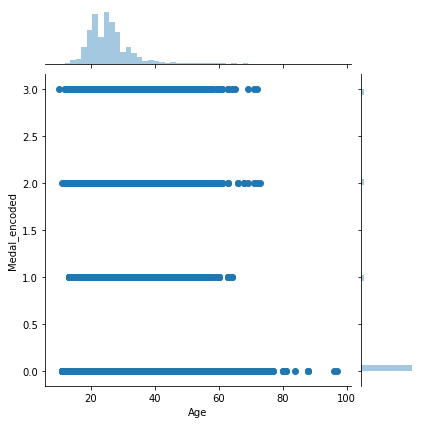

In [34]:
import seaborn as sns

sns.jointplot(x='Age', y='Medal_encoded', kind='scatter',data= df_swim)

In [38]:
 df_swim['Decade'] = df_swim['Year'] // 10 * 10

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_swim.groupby('Decade')['Age'].mean()

Decade
1890.0    23.580645
1900.0    27.369012
1910.0    27.538620
1920.0    28.894520
1930.0    29.014736
1940.0    28.783947
1950.0    26.070041
1960.0    24.764124
1970.0    24.089992
1980.0    23.923028
1990.0    24.632649
2000.0    25.656239
2010.0    26.078884
Name: Age, dtype: float64

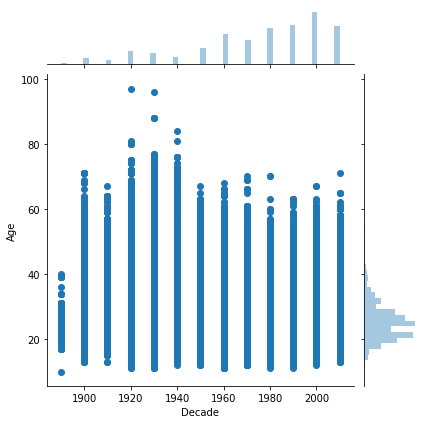

In [40]:
sns.jointplot (x= 'Decade', y='Age', kind= 'scatter', data= df_swim)

In [41]:
df_swim['Mean_Age'] = df_swim['Age'].mean()

/Users/amyscott/anaconda2/envs/nthinkfulpython/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


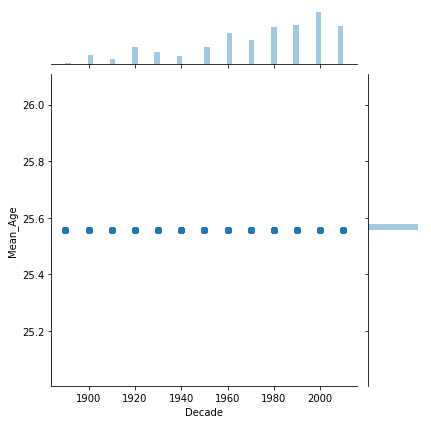

In [42]:
sns.jointplot (x= 'Decade', y='Mean_Age', kind= 'scatter', data= df_swim)

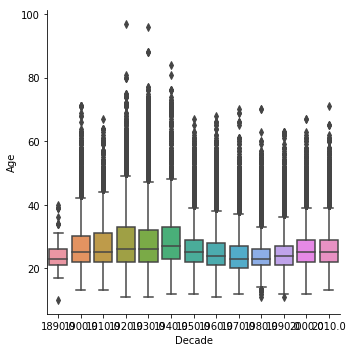

In [45]:
sns.catplot (x= 'Decade', y='Age', kind= 'box', data= df_swim)

In [54]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df_swim.Age)
Y = df_swim.Medal_encoded
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').